<a href="https://colab.research.google.com/github/kamalova/Capstone/blob/main/dataload_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
import string
string.punctuation
import re
from sklearn.feature_extraction.text import TfidfVectorizer


# Data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn's beautiful styling
import seaborn as sns
sns.set_style('whitegrid', {'axes.facecolor': '0.9'})

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud

In [ ]:
%rm -rf sample_data/

In [ ]:
# Downloading datasets
reviews_sd = pd.read_csv('/content/reviews_sd.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=20000);
reviews_scl = pd.read_csv('/content/reviews_scl.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=20000);
reviews_scr = pd.read_csv('/content/reviews_scr.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=20000);
reviews_sf = pd.read_csv('/content/reviews_sf.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=20000);
reviews_sm = pd.read_csv('/content/reviews_sm.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=20000);

In [ ]:
print(reviews_sd.shape, reviews_scl.shape, reviews_scr.shape, reviews_sf.shape, reviews_sm.shape)

(20000, 6) (20000, 6) (20000, 6) (20000, 6) (20000, 6)


In [ ]:
reviews_sd


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,29967,62788,2010-07-09,151260,Debbie,"When I booked our stay in San Diego at Dennis Kellehers\r<br/>home, I had no idea what we were about to experience.\r<br/>Dennis covered all basis to make us feel welcome and at home. He was an amazing host from the soap to the amazing coffee from bird rock cafe. He provided us with lists of places to see and restaurants to experience. Thank you again for your amazing efforts,\r<br/>Debbie, Christa, Amy, Nick, Baylee and Conr\r<br/>\r<br/>\r<br/>\r<br/>\r<br/>On a scale of 1 to 5 I definitely give Dennis a 5"
1,29967,64568,2010-07-14,141552,Eric,"This was my first experience with using airbnb. I have used similar sites such as (Hidden by Airbnb) before. Like using something for the first time I was a bit hesitant, but Dennis did all that he could to reassure me and show me that this was the place for me and my family to stay while in San Diego.\r<br/>\r<br/>Before the trip Dennis was in constant communication, he even sent out a little information sheet to tell us how everything runs and what good restaurants/entertainment/toursit items are around the San Diego area and his opinion on each. He answered every questin that we had and even more. \r<br/>\r<br/>During the trip we were more than pleasently surprised with the house. It is in very great condition, and kept very clean. The finishes are modern and updated. The beds were all comfortable and the ammenaties were just like a hotel. Its very private and never had any problems with noise or neighbors. Kitchen items were provided so we were able to cook a few things when we had to. It is a 5 min drive or 15 min walk to the beach. Restaurants are accessble by foot or a few min drive.\r<br/>\r<br/>Dennis even though out of town, was certainly accessable by email and phone. We had no problems getting our questions answered in a timely fashion. He certainly knows how to take care of his customers even without being in town at the time.\r<br/>\r<br/>Next time we are in San Diego we will definitely see if this place is avaialble and for the price it is a great deal!\r<br/>\r<br/>Thank you Dennis we appreciate you opening your house to us and we thoroughly enjoy it. You were a great remote host and I hope to do business with you again."
2,29967,67502,2010-07-22,141591,David,"We found the house to be very accommodating--everything advertised and more. Also, Dennis was most helpful. We would certainly book this property again."
3,29967,70466,2010-07-29,125982,Anders,As advertised and more. Dennis was very helpful with just about everything. We greatly enjoyed our stay at his place.
4,29967,74876,2010-08-07,29835,Miyoko,"We had a great time in San Diego. Denis' house was perfect!!! clean and welcoming with all the necessary amenities. Best of all it is located near everything. Denis gave us all the information we needed to atractions, restaurant etc... I definitely recomand this place."
...,...,...,...,...,...,...
19995,561997,307106420,2018-08-13,34154833,Maria,"This home and its owner are just so special. If you search San Diego homes on Airbnb, you won't really find anything like this. I was so surprised to find the listing that I just grabbed it right away (so PS. if you're thinking twice, just go BOOK IT!). This place is so (Website hidden by Airbnb) got the green space, so many nooks to chill out, read a book, drink wine, hang with your family; it's got the beautiful large home with all the amenities you'd ever need and of course, the amazing hospitality of Beverlee, who really goes out of her way to make sure guests are comfortable and well taken cared of. My toddler somehow really took to Beverlee even in the short amount of time we saw her and it just melted our hearts. If you have kids, what did I say? GO BOOK IT! There's so much for them to indulge their curiosities in -- the koi fish, for example, is just so fun. Beverlee even left some fish food so our toddler can feed them in the

In [ ]:
df_reviews = pd.concat([reviews_scl,reviews_scr, reviews_sd,reviews_sf,reviews_sm])

In [ ]:
df_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,26445399,297987565,2018-07-28,3558426,Barry,This cottage has everything you need and is centerally locates on the peninsula. Walking access to great restaurants in Palo Alto. Short drive or bike ride to Stanford’s campus.
1,26445399,770057849,2021-06-13,8627033,Paulette,Enjoyed our stay very much and would stay here again.
2,26445399,398555253897209391,2021-07-03,75784163,Maxime,"Great studio in the heart of Menlo Park, close to Downtown Palo Alto and restaurants! The studio is not huge but very well arranged, and contains everything we needed during our stay. Sandra was super helpful, I can only recommend you stay at her place!"
3,26445399,409426845056861199,2021-07-18,259305933,Emily,"Great location, friendly community, safe, beautiful neighborhood, very walkable. Property matched description. I would recommend.<br/> <br/>Sandra and Carl were also very accomodating and offered thoughtful recommendations."
4,26445399,418126732383403544,2021-07-30,43307267,Tengpeng,Sandra is super nice and friendly. The place has almost everything we need. There are restaurants and markets within walking distance. I can't ask for more at this price. Really enjoy the stay.
...,...,...,...,...,...,...
19995,4202946,45480422,2015-09-03,38660091,Sabrina,"l'appartamento è molto carino ed accogliente. Tutto molto pulito e fornito di asciugamani e del necessario per cucinare. Abbiamo apprezzato molto la macchina per il caffè con le cialde a nostra dispozione. L'host è stato molto gentile. Il quartiere è comodo per l'aeroporto e c'è una fermata della BART a 20 minuti di cammino. Di sera non è bellissimo, ma nulla di preoccupante."
19996,4202946,45714462,2015-09-05,18325928,Vinayak,Lina and marina are great hosts<br/>We reached the place late at 10 pm and she drove us to closest restaurant for dinner. We had wonderful time at Lina's place & I would love to visit again when back in San Francisco
19997,4202946,46042519,2015-09-07,30495599,Fika,"The apartment is very nice, clean and everything as seen in the picture. The location is very strategic near to the airport, many restaurants and convenient store , so it is easy for us to find some foods. It is also near to the downtown SF just only take about 15 minutes by car. One thing that I like most from Marina and Lena's place is there are some fruit trees like lemon, orange in their place. They provided us one big plate of fruit and some drinks as compliments.They always communicated with us and try to facilitate what we need. I highly recommend Marina and Lena's place for sure if you want to traveling to SF"
19998,4202946,47711932,2015-09-21,41081098,Lourdes M,"It was a great experience staying at Marina and Lena's place. The house was clean and looked exactly as it does in the picture. When my friends and I first arrived, we were greeted by Marina's husband and he showed us around the house and even showed us how to get to nearby restaurants, stores and the CalTrain station, which were all within short walking distance. It was a comfortable place to stay and had everything we needed. Hosts were very nice and provided fruits with drinks. We would stay here again."


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642050 entries, 0 to 199105
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1642050 non-null  int64 
 1   id             1642050 non-null  int64 
 2   date           1642050 non-null  object
 3   reviewer_id    1642050 non-null  int64 
 4   reviewer_name  1642048 non-null  object
 5   comments       1641680 non-null  object
dtypes: int64(3), object(3)
memory usage: 87.7+ MB


In [ ]:
df_reviews.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      2
comments         370
dtype: int64

In [ ]:
df_reviews.dropna(subset =['comments', 'reviewer_name'],how='any',axis=0,inplace=True)

In [ ]:
df_reviews['comments'].str.match('The host canceled this reservation').sum()

2972

In [ ]:
def clean_text(text):
    '''
    input- 'text' to be preprocessed
    output- converts input 'text' to lowercase,remove square brackets,links,punctuation 
    and words containing numbers. Removes common accent characters and returns clean text. 
    '''
    text = text.lower()
    text = re.sub('<br\s?\/>|<br>',"", text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    return text

In [ ]:
df_reviews['comments'] = df_reviews['comments'].apply(lambda x: clean_text(x))
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,26445399,297987565,2018-07-28,3558426,Barry,this cottage has everything you need and is centerally locates on the peninsula walking access to great restaurants in palo alto short drive or bike ride to stanford’s campus
1,26445399,770057849,2021-06-13,8627033,Paulette,enjoyed our stay very much and would stay here again
2,26445399,398555253897209391,2021-07-03,75784163,Maxime,great studio in the heart of menlo park close to downtown palo alto and restaurants the studio is not huge but very well arranged and contains everything we needed during our stay sandra was super helpful i can only recommend you stay at her place
3,26445399,409426845056861199,2021-07-18,259305933,Emily,great location friendly community safe beautiful neighborhood very walkable property matched description i would recommend sandra and carl were also very accomodating and offered thoughtful recommendations
4,26445399,418126732383403544,2021-07-30,43307267,Tengpeng,sandra is super nice and friendly the place has almost everything we need there are restaurants and markets within walking distance i cant ask for more at this price really enjoy the stay


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
df_reviews['comments'] = df_reviews['comments'].apply(lambda x: remove_emoji(x))

In [ ]:
df_reviews.reset_index(inplace=True, drop=True)

In [ ]:
df_reviews['text_length'] = df_reviews['comments'].apply(lambda x : len(x))
df_reviews.head(4)

,listing_id,id,date,reviewer_id,reviewer_name,comments,text_length
0,26445399,297987565,2018-07-28,3558426,Barry,this cottage has everything you need and is centerally locates on the peninsula walking access to great restaurants in palo alto short drive or bike ride to stanford’s campus,176
1,26445399,770057849,2021-06-13,8627033,Paulette,enjoyed our stay very much and would stay here again,52
2,26445399,398555253897209391,2021-07-03,75784163,Maxime,great studio in the heart of menlo park close to downtown palo alto and restaurants the studio is not huge but very well arranged and contains everything we needed during our stay sandra was super helpful i can only recommend you stay at her place,247
3,26445399,409426845056861199,2021-07-18,259305933,Emily,great location friendly community safe beautiful neighborhood very walkable property matched description i would recommend sandra and carl were also very accomodating and offered thoughtful recommendations,206


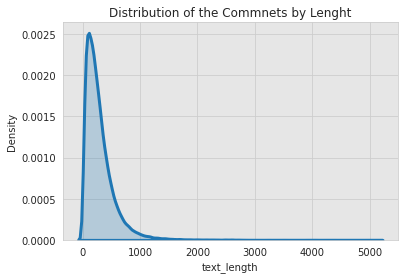

In [ ]:
# Plot distribution of the Comment Lenghth
sns.distplot(df_reviews['text_length'],hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}).set(title='Distribution of the Commnets by Lenght')
plt.show();

In [ ]:
#! pip install langdetect

In [ ]:
# Language detect
from langdetect import detect

In [ ]:
def detect_lang(x):
    try:
        lang = detect(x)
    except:
        lang = 'other'
    return lang

df_reviews['language'] = df_reviews['comments'].apply(detect_lang)

In [ ]:
df_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,text_length,language
0,26445399,297987565,2018-07-28,3558426,Barry,this cottage has everything you need and is centerally locates on the peninsula walking access to great restaurants in palo alto short drive or bike ride to stanford’s campus,176,en
1,26445399,770057849,2021-06-13,8627033,Paulette,enjoyed our stay very much and would stay here again,52,en
2,26445399,398555253897209391,2021-07-03,75784163,Maxime,great studio in the heart of menlo park close to downtown palo alto and restaurants the studio is not huge but very well arranged and contains everything we needed during our stay sandra was super helpful i can only recommend you stay at her place,247,en
3,26445399,409426845056861199,2021-07-18,259305933,Emily,great location friendly community safe beautiful neighborhood very walkable property matched description i would recommend sandra and carl were also very accomodating and offered thoughtful recommendations,206,en
4,26445399,418126732383403544,2021-07-30,43307267,Tengpeng,sandra is super nice and friendly the place has almost everything we need there are restaurants and markets within walking distance i cant ask for more at this price really enjoy the stay,187,en
...,...,...,...,...,...,...,...,...
99987,4202946,45480422,2015-09-03,38660091,Sabrina,lappartamento è molto carino ed accogliente tutto molto pulito e fornito di asciugamani e del necessario per cucinare abbiamo apprezzato molto la macchina per il caffè con le cialde a nostra dispozione lhost è stato molto gentile il quartiere è comodo per laeroporto e cè una fermata della bart a minuti di cammino di sera non è bellissimo ma nulla di preoccupante,366,it
99988,4202946,45714462,2015-09-05,18325928,Vinayak,lina and marina are great hostswe reached the place late at pm and she drove us to closest restaurant for dinner we had wonderful time at linas place i would love to visit again when back in san francisco,207,en
99989,4202946,46042519,2015-09-07,30495599,Fika,the apartment is very nice clean and everything as seen in the picture the location is very strategic near to the airport many restaurants and convenient store so it is easy for us to find some foods it is also near to the downtown sf just only take about minutes by car one thing that i like most from marina and lenas place is there are some fruit trees like lemon orange in their place they provided us one big plate of fruit and some drinks as complimentsthey always communicated with us and try to facilitate what we need i highly recommend marina and lenas place for sure if you want to traveling to sf,611,en
99990,4202946,47711932,2015-09-21,41081098,Lourdes M,it was a great experience staying at marina and lenas place the house was clean and looked exactly as it does in the picture when my friends and i first arrived we were greeted by marinas husband and he showed us around the house and even showed us how to get to nearby restaurants stores and the caltrain station which were all within short walking distance it was a comfortable place to stay and had everything we needed hosts were very nice and provided fruits with drinks we would stay here again,500,en


In [ ]:
df_reviews.language.value_counts()

en       95625
fr        1083
de         616
es         556
other      478
ro         390
it         180
af         153
nl         122
pt         103
ca          88
so          73
cs          73
da          47
no          46
sv          46
pl          38
tl          36
ru          33
hr          29
cy          29
sw          22
sl          18
tr          17
fi          16
sk          15
et          15
hu          11
id          10
lv           8
vi           5
lt           4
sq           4
th           1
he           1
bg           1
Name: language, dtype: int64

In [ ]:
df_reviews = df_reviews.loc[(df_reviews['language'] == 'en')] 

In [ ]:
df_reviews.language.value_counts()

en    95625
Name: language, dtype: int64

In [ ]:
df_reviews.shape

(95625, 8)

In [ ]:
# Tfidfvectorizer computes word counts, idf and tf-idf values all at once
 
# compute IDF values (Inverse Document Frequency), weight assigned to each word depending on how commonly used
vectorizer = TfidfVectorizer(min_df=53, max_features=50, stop_words='english', ngram_range=(1,1), use_idf=True)
matrix = vectorizer.fit_transform(df_reviews['comments'])


In [ ]:
# see first vector, IDF values for first comment

pd.DataFrame(matrix[0].T.todense(), index=vectorizer.get_feature_names(), 
             columns=["tfidf"]).sort_values(['tfidf'], ascending=False).style.bar(subset=['tfidf'], color=['#5fba7d'])

,tfidf
cottage,0.575681
need,0.556261
restaurants,0.531211
great,0.277451
amazing,0.000000
really,0.000000
loved,0.000000
lovely,0.000000
needed,0.000000
neighborhood,0.000000


In [ ]:
df_reviews['comments'][27]

'great place great host great location enough said'

### Estimate polarity

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# test it out on first comment

def sentiment_analyzer_scores(comment):
    score = analyzer.polarity_scores(comment)
    return(pd.DataFrame.from_dict(score, orient='index'))

sentiment_analyzer_scores(df_reviews['comments'][27])

,0
neg,0.0000
neu,0.2890
pos,0.7110
compound,0.9231


In [ ]:
# we want one overall polarity score, so just look at the 'compound' score

compound_polarity= lambda s: (analyzer.polarity_scores(s))['compound']

In [ ]:
df_reviews['polarity'] = df_reviews.comments.map(compound_polarity)

In [ ]:
df_reviews[:5].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,id,date,reviewer_id,reviewer_name,comments,text_length,language,polarity
0,26445399,297987565,2018-07-28,3558426,Barry,this cottage has everything you need and is centerally locates on the peninsula walking access to great restaurants in palo alto short drive or bike ride to stanford’s campus,176,en,0.624900
1,26445399,770057849,2021-06-13,8627033,Paulette,enjoyed our stay very much and would stay here again,52,en,0.510600
2,26445399,398555253897209391,2021-07-03,75784163,Maxime,great studio in the heart of menlo park close to downtown palo alto and restaurants the studio is not huge but very well arranged and contains everything we needed during our stay sandra was super helpful i can only recommend you stay at her place,247,en,0.954900
3,26445399,409426845056861199,2021-07-18,259305933,Emily,great location friendly community safe beautiful neighborhood very walkable property matched description i would recommend sandra and carl were also very accomodating and offered thoughtful recommendations,206,en,0.959500
4,26445399,418126732383403544,2021-07-30,43307267,Tengpeng,sandra is super nice and friendly the place has almost everything we need there are restaurants and markets within walking distance i cant ask for more at this price really enjoy the stay,187,en,0.924500


In [ ]:
df_reviews[df_reviews['polarity']<0][:10].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,id,date,reviewer_id,reviewer_name,comments,text_length,language,polarity
23,20802498,301206640,2018-08-03,23736851,Uri,do not pay more than for this house otherwise get a hotel room as until renovated just a bit this is not a good catch,119,en,-0.275500
59,1353178,10120145,2014-02-01,1544808,Jeanne,rob and vic family class acts,30,en,-0.557400
415,2943488,198532110,2017-09-29,66031497,Oleg,good location well organized place but very bad communication host wanted to charge extra then for every min after posted check out time after i called and the host confirmed it was ok i called apologizing for still being there host said was ok to be late and would call me back the host had not call back and i left the place noon the host then demanded extra fees i refused,390,en,-0.570400
574,1364787,301805298,2018-08-04,168462305,Olivia,the host carina had a very strict cancellation policy so i didn’t get a chance to stay there i tried to get a refund and carina offered only the cleaning fee but i never saw that the cleaning fee was refunded i was not happy dealing with her because she was not flexible and would not give me my money back even though i gave her plenty of notice that my brother forgot about my trip the host was not understanding at all this was stressful to deal with be aware that she will not give you a refund at all,505,en,-0.869400
601,1364787,766060626,2021-06-04,342057388,Tamara,this is the worst travel experience i have ever had do not stay with this host unless you want to be stranded in a strange city with nowhere to stayi flew into the us with the two doses of the pfizer vaccine plus the covid test required by delta airlines i told the host carina that i was flying directly from buenos aires and she accepted both my booking and payment i hidden by airbnb ’ed her from the airport to tell her i had arrived at pm she asked when i would be coming when i arrived at her house less than hours later she told me i had to be quarantined in a hotel for days nowhere in the airbnb home description nor during our hidden by airbnb exchanges was there any mention of quarantine yet she wouldn’t let me in her house i was left out in the streets and had to call the police i am years old and it was extremely upsetting to be stranded in a foreign cityairbnb has been involved and ruled in my favor and thankfully reimbursed the whole amount of the booking plus fifty percent of the sheraton hotel billdo not recommend,1048,en,-0.542800
638,21373,45184934,2015-08-31,10645832,Beth,great location off alma and near university and although i missed mei i enjoyed meeting and talking with ross i stayed over the weekend and had no trouble at all with parking very comfortable bed and nice room with plenty of closet space after a dozen trips this was the first time i was not the only guest at an airbnb there are rooms here on the lower level and my learning was that it was a lot noisier than im used to i had some trouble getting to sleep for an early flight especially when the other guests returned at and took showers one of them walked into my room at and turned on the light before realizing his mistake so okay next time i know to lock the door no reflection on the hosts but since im dependent on the politeness of other guests in these situations ill probably look for single room locations in the future,847,en,-0.432500
737,21373,220108780,2017-12-20,36278858,So Yoon,i really liked the location of this house stanford is in walking distance though i travelled by walk i felt no difficulties finding famous spots the house was located in a very quiet town and the room was really cozy the bed might be a bit small for the person whose height is over just for your reference,306,en,-0.079000
796,3104528,91505861,2016-08-05,61714636,Yu,we family of four with two teenager daughters us citizen moved to asia a few years ago still having a house in bay area just moved out of this property after staying for about weeks we rented this house from airbnb

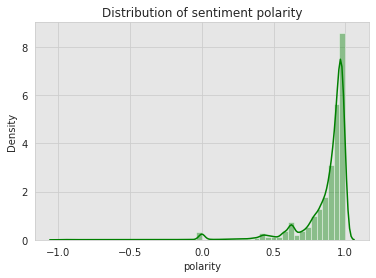

In [ ]:
sns.distplot(df_reviews['polarity'], norm_hist=True, color='g')
plt.title('Distribution of sentiment polarity');

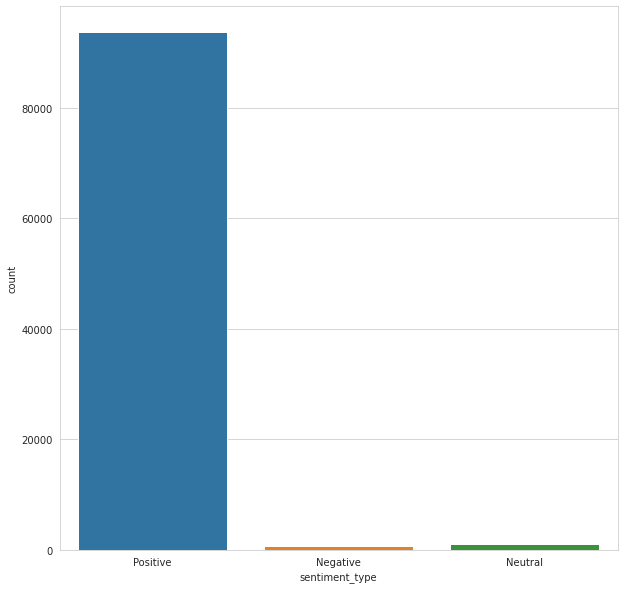

In [ ]:
def f(df_reviews):
    if df_reviews['polarity'] > 0:
        val = "Positive"
    elif df_reviews['polarity'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_reviews['sentiment_type'] = df_reviews.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="sentiment_type", data=df_reviews)

In [ ]:
df_reviews[df_reviews['sentiment_type']=='Neutral'][:10].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,id,date,reviewer_id,reviewer_name,comments,text_length,language,polarity,sentiment_type
229,4952,57817171,2015-12-29,4130118,Robert,the host provided a key to the property and upon arrival provided for a tour of the property the host often met us at the door as we returned for the evening,157,en,0.000000,Neutral
259,4952,138978575,2017-03-22,110497961,Henry,convenient place for visiting stanford,38,en,0.000000,Neutral
342,2894634,258806592,2018-04-29,12141334,Tita,vic is a very attentive host,28,en,0.000000,Neutral
525,2983703,483342376510952035,2021-10-28,219326,Peg,very handy to downtown mountain view aka known as old mountain view very walkable and public transportation is availablethanks for the hospitality,147,en,0.000000,Neutral
552,21373,1632907,2012-07-04,2184084,Bo,this is a spectacular place with spectacular people,51,en,0.000000,Neutral
593,1364787,420496842,2019-03-06,136847697,Tadashi,it was indeed a cozy room,25,en,0.000000,Neutral
621,21373,25430083,2015-01-15,15627492,Sean,the reservation was canceled days before arrival this is an automated posting,79,en,0.000000,Neutral
686,21373,68779704,2016-04-06,6148628,Annie,the host canceled this reservation days before arrival this is an automated posting,85,en,0.000000,Neutral
690,3104528,15565626,2014-07-11,8751897,Alexandra,the reservation was canceled days before arrival this is an automated posting,79,en,0.000000,Neutral
713,21373,97809558,2016-08-28,74106708,Luna,the host canceled this reservation days before arrival this is an automated posting,85,en,0.000000,Neutral


In [ ]:
df_reviews = df_reviews[~df_reviews['comments'].str.endswith(('is an automated posting'))]

In [ ]:
df_reviews[df_reviews['sentiment_type']=='Neutral'][:10].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,id,date,reviewer_id,reviewer_name,comments,text_length,language,polarity,sentiment_type
229,4952,57817171,2015-12-29,4130118,Robert,the host provided a key to the property and upon arrival provided for a tour of the property the host often met us at the door as we returned for the evening,157,en,0.000000,Neutral
259,4952,138978575,2017-03-22,110497961,Henry,convenient place for visiting stanford,38,en,0.000000,Neutral
342,2894634,258806592,2018-04-29,12141334,Tita,vic is a very attentive host,28,en,0.000000,Neutral
525,2983703,483342376510952035,2021-10-28,219326,Peg,very handy to downtown mountain view aka known as old mountain view very walkable and public transportation is availablethanks for the hospitality,147,en,0.000000,Neutral
552,21373,1632907,2012-07-04,2184084,Bo,this is a spectacular place with spectacular people,51,en,0.000000,Neutral
593,1364787,420496842,2019-03-06,136847697,Tadashi,it was indeed a cozy room,25,en,0.000000,Neutral
819,21373,308109253,2018-08-15,186496708,Thomas,incredible place with incredible people,40,en,0.000000,Neutral
1136,40560,255798982,2018-04-21,1192820,Dan,nothing to add to these reviews,31,en,0.000000,Neutral
1221,3143994,137486543,2017-03-15,83619745,Matthew,this was my second time staying at elss condo it was just as impeccable as the first,85,en,0.000000,Neutral
1270,62799,108175939,2016-10-14,5992012,Jeremy,its very convenient very central location in palo alto,54,en,0.000000,Neutral


In [ ]:
pos_reviews = df_reviews[df_reviews['sentiment_type']=='Positive']

In [ ]:
neg_reviews = df_reviews[df_reviews['sentiment_type']=='Negative']

In [ ]:
pos_reviews =  ''.join(pos_reviews['comments'])

In [ ]:
from wordcloud.wordcloud import STOPWORDS
pos_wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(pos_reviews)

plt.figur(figsize=(15,10))
plt.axis.off
plt.imshow(pos_wordcloud)

TypeError: ignored

In [ ]:
#df_reviews.to_csv('df_reviews_polarity.csv', index=False)